In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 29.3 MB/s 
     |████████████████████████████████| 16.7 MB 822 kB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/fire_archive_M6_96619.csv",
                 usecols=["latitude", "longitude", "brightness", "acq_date"],
                 parse_dates=["acq_date"])

df.head()

,latitude,longitude,brightness,acq_date
0,-11.8070,142.0583,313.0,2019-08-01
1,-11.7924,142.0850,319.3,2019-08-01
2,-12.8398,132.8744,311.6,2019-08-01
3,-14.4306,143.3035,310.1,2019-08-01
4,-12.4953,131.4897,310.3,2019-08-01


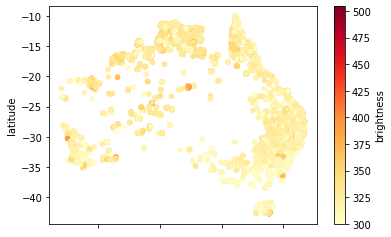

In [ ]:
df.plot(x="longitude", y="latitude", kind="scatter", c="brightness", colormap="YlOrRd")
plt.show()

In [ ]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

countries.sample(20)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
57,24994885,Africa,Cameroon,CMR,77240.0,"POLYGON ((14.49579 12.85940, 14.89336 12.21905..."
89,282814,Oceania,Vanuatu,VUT,723.0,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488..."
157,28036829,Asia,Yemen,YEM,73450.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
91,68414135,Asia,Thailand,THA,1161000.0,"POLYGON ((105.21878 14.27321, 104.28142 14.416..."
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
64,6163195,Africa,Sierra Leone,SLE,10640.0,"POLYGON ((-13.24655 8.90305, -12.71196 9.34271..."
153,10674723,Europe,Czechia,CZE,350900.0,"POLYGON ((15.01700 51.10667, 15.49097 50.78473..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
118,2823859,Europe,Lithuania,LTU,85620.0,"POLYGON ((26.49433 55.61511, 26.58828 55.16718..."


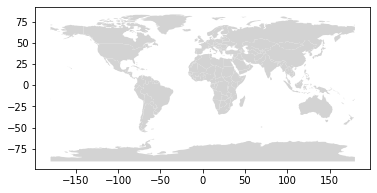

In [ ]:
countries.plot(color="lightgrey")

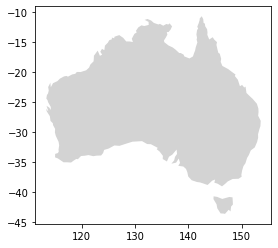

In [ ]:
countries[countries["name"] == "Australia"].plot(color="lightgrey")

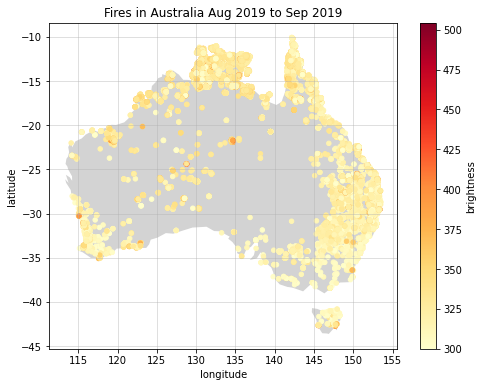

In [ ]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Australia"].plot(color="lightgrey", ax=ax)

# parse dates for plot's title
first_month = df["acq_date"].min().strftime("%b %Y")
last_month = df["acq_date"].max().strftime("%b %Y")

# plot points
df.plot(x="longitude", y="latitude", kind="scatter", c="brightness", colormap="YlOrRd", 
        title=f"Fires in Australia {first_month} to {last_month}", ax=ax)

# add grid
ax.grid(b=True, alpha=0.5)

plt.show()

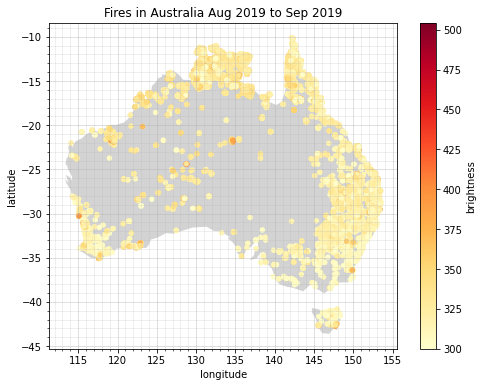

In [ ]:
# get axes limits
x_lo, x_up = ax.get_xlim()
y_lo, y_up = ax.get_ylim()

# add minor ticks with a specified sapcing (deg)
deg = 1
ax.set_xticks(np.arange(np.ceil(x_lo), np.ceil(x_up), deg), minor=True)
ax.set_yticks(np.arange(np.ceil(y_lo), np.ceil(y_up), deg), minor=True)
ax.grid(b=True, which="minor", alpha=0.25)

fig

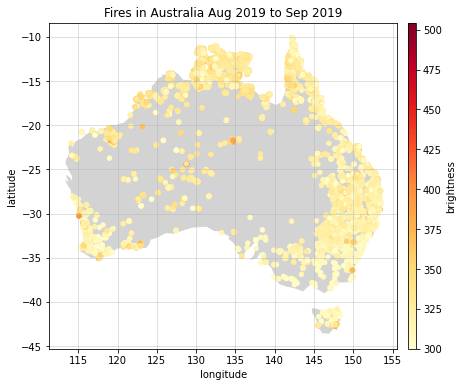

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Australia"].plot(color="lightgrey", ax=ax)

# parse dates for plot's title
first_month = df["acq_date"].min().strftime("%b %Y")
last_month = df["acq_date"].max().strftime("%b %Y")

# plot points
df.plot(x="longitude", y="latitude", kind="scatter", c="brightness", colormap="YlOrRd", 
        title=f"Fires in Australia {first_month} to {last_month}", ax=ax, colorbar=False)

# define colorbar values
norm = mpl.colors.Normalize(vmin=df["brightness"].min(), vmax=df["brightness"].max())

# set colorbar on ax
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=-0.15)
mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.YlOrRd, norm=norm, label="brightness")

# add grid
ax.grid(b=True, alpha=0.5)

plt.show()

# New Section

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/usmassshootings.csv",
                 usecols=["latitude", "longitude", "fatalities", "date"],
                 parse_dates=["date"])

df.head()

,date,fatalities,latitude,longitude
0,2015-07-16,5,35.047157,-85.311821
1,2015-06-17,9,32.788387,-79.933144
2,2014-10-24,5,48.050823,-122.176918
3,2014-02-20,4,41.487103,-120.542236
4,2013-09-16,12,38.874981,-76.994530


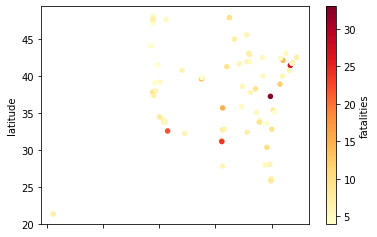

In [ ]:
df.plot(x="longitude", y="latitude", kind="scatter", c="fatalities", colormap="YlOrRd")
plt.show()

In [ ]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


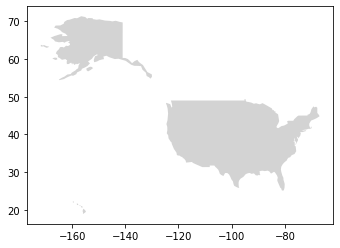

In [ ]:
countries[countries["name"] == "United States of America"].plot(color="lightgrey")

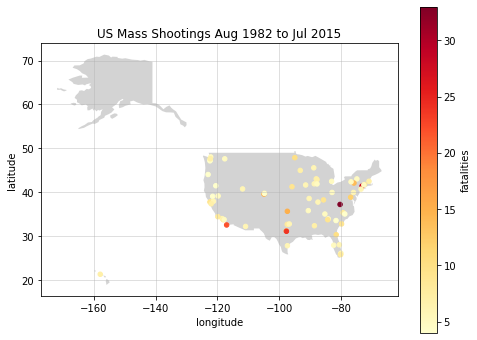

In [ ]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax=ax)

# parse dates for plot's title
first_month = df["date"].min().strftime("%b %Y")
last_month = df["date"].max().strftime("%b %Y")

# plot points
df.plot(x="longitude", y="latitude", kind="scatter", c="fatalities", colormap="YlOrRd", 
        title=f"US Mass Shootings {first_month} to {last_month}", ax=ax)

# add grid
ax.grid(b=True, alpha=0.5)

plt.show()